In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset as netcdf_dataset
import matplotlib.colors as colors
import cmocean

In [2]:
file_location = '../data/temp/'
figure_location = '../results/figures/'

uk_annual = pd.read_csv(file_location+"uk37_ann_nemo_to_plot.csv")
uk_winter = pd.read_csv(file_location+"uk37_nov_may_nemo_to_plot.csv")

tex_annual = pd.read_csv(file_location+"tex86_ann_nemo_to_plot.csv")

trans_bias = pd.read_csv(file_location + "nemo_mean_ann_results_wider.csv")

In [3]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [4]:
def create_mapfigure(dataframe, df_column, plot_title, temp_range, filename):
    """
    Creates a map of the Mediterranean Sea area and puts some scatter plot data on it. 
    
    Optimized for displaying temperature offsets with the temp_range input list and midpoint 
    at 0. 
    
    input must be a pandas dataframe with columns named "Latitude" and "Longitude"
    """

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = [4,2])

    [temp_min, temp_max]  = temp_range
    mid_val = 0.

    im = ax.scatter(dataframe["Longitude"],dataframe["Latitude"],\
                transform=ccrs.PlateCarree(), \
                c = dataframe[df_column], \
                cmap = cmocean.cm.balance,\
                clim=(temp_min, temp_max), \
                norm=MidpointNormalize(midpoint=mid_val,\
                                       vmin=temp_min, vmax=temp_max)\
                )
    
    ax.title.set_text(plot_title)
    ax.set_extent([-8,38,30,46])
    ax.coastlines()

    fig.colorbar(im, ax=ax, orientation = "horizontal")
    
    plt.savefig(figure_location+filename+'.svg')


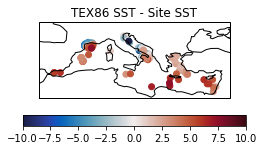

In [26]:
create_mapfigure(tex_annual, "proxy_offset_site_sst", "TEX86 SST - Site SST", [-10,10], "TEX86 proxy offset")

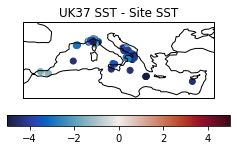

In [32]:
create_mapfigure(uk_annual, "proxy_offset_site", "UK37 SST - Site SST", [-5,5], "UK37 proxy offset")

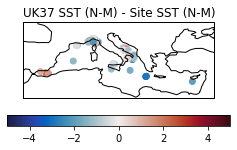

In [33]:
create_mapfigure(uk_winter, "proxy_offset_nov_may_site", "UK37 SST (N-M) - Site SST (N-M)", 
                 [-5,5], "Nov-May UK37 proxy offset")

/home/addison/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


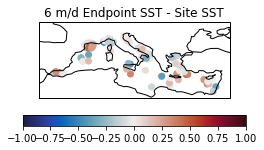

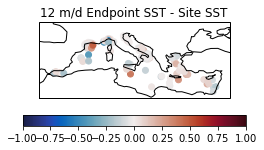

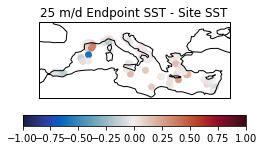

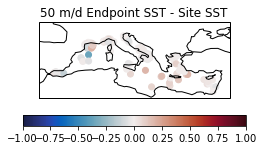

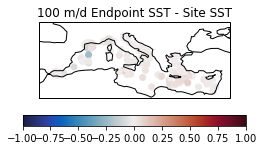

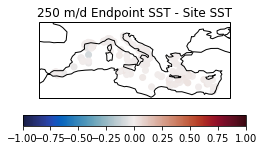

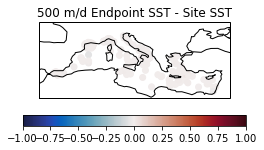

In [5]:
speeds = ["Sp_6", "Sp_12", "Sp_25", "Sp_50", "Sp_100", "Sp_250", "Sp_500"]

speed_dict = {"Sp_6":"6 m/d", "Sp_12":"12 m/d", "Sp_25":"25 m/d", 
              "Sp_50":"50 m/d", "Sp_100":"100 m/d", 
              "Sp_250":"250 m/d", "Sp_500":"500 m/d"}

for speed in speeds:
    create_mapfigure(trans_bias, "offset_ann_sst_" + speed, speed_dict[speed] + " Endpoint SST - Site SST", 
                     [-1,1], "Modeled transport bias " + speed)